In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
age_data = pd.read_csv('/Users/blakemyers/Desktop/age_gender.csv')
age_data.tail(10)

,age,ethnicity,gender,img_name,pixels
23695,96,0,1,20170110173805290.jpg.chip.jpg,133 136 154 153 165 142 140 157 163 141 152 15...
23696,99,0,0,20170117195137161.jpg.chip.jpg,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
23697,99,0,1,20170113013141679.jpg.chip.jpg,114 127 154 173 188 196 212 217 217 207 195 19...
23698,99,0,1,20170120133837030.jpg.chip.jpg,234 229 217 187 205 210 217 204 183 166 169 16...
23699,99,0,1,20170120134718759.jpg.chip.jpg,206 183 141 116 117 120 110 103 104 111 111 11...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...
23704,99,0,1,20170110182052119.jpg.chip.jpg,156 161 160 165 170 173 166 177 183 191 187 18...


In [3]:
def label_age (row):
    if row['age'] >= 0 and row['age'] < 11:
        return 0
    elif row['age'] > 10 and row['age'] < 21:
        return 1
    elif row['age'] > 20 and row['age'] < 31:
        return 2
    elif row['age'] > 30 and row['age'] < 41:
        return 3
    elif row['age'] > 40 and row['age'] < 51:
        return 4
    elif row['age'] > 50 and row['age'] < 61:
        return 5
    elif row['age'] > 60 and row['age'] < 71:
        return 6
    elif row['age'] > 70 and row['age'] < 81:
        return 7
    elif row['age'] > 80 and row['age'] < 91:
        return 8
    else:
        return 9

In [4]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [5]:
age_data.head()

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,0
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,0


In [6]:
n = len(pd.unique(age_data['age']))

In [7]:
n

104

In [8]:
age_data["age"].max()

116

In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train= np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=1,validation_data=(X_test, y_test))

Train on 18964 samples, validate on 4741 samples
Epoch 1/30
18964/18964 [==============================] - 1384s 73ms/step - loss: 1.9280 - accuracy: 0.3277 - val_loss: 1.8577 - val_accuracy: 0.3501
Epoch 2/30
18964/18964 [==============================] - 1465s 77ms/step - loss: 1.6688 - accuracy: 0.4028 - val_loss: 1.5782 - val_accuracy: 0.4533
Epoch 3/30
18964/18964 [==============================] - 1406s 74ms/step - loss: 1.4720 - accuracy: 0.4594 - val_loss: 1.3503 - val_accuracy: 0.4902
Epoch 4/30
18964/18964 [==============================] - 1503s 79ms/step - loss: 1.3575 - accuracy: 0.4844 - val_loss: 1.2847 - val_accuracy: 0.5163
Epoch 5/30
18964/18964 [==============================] - 1478s 78ms/step - loss: 1.2688 - accuracy: 0.5089 - val_loss: 1.3251 - val_accuracy: 0.4803
Epoch 6/30
18964/18964 [==============================] - 1406s 74ms/step - loss: 1.2037 - accuracy: 0.5262 - val_loss: 1.1876 - val_accuracy: 0.5322
Epoch 7/30
18964/18964 [===========================

In [14]:
local_path = '/Users/blakemyers/Desktop/Jupyter/DeepLearning2021/TrainedModelSp21'
model.save(local_path)

In [15]:
y_pred=model.predict_classes(X_test)

In [16]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [17]:
cm

array([[ 581,   13,   22,    3,    1,    1,    1,    0,    1,    0],
       [  66,  102,  167,   16,    1,    2,    0,    0,    1,    0],
       [  12,   69, 1190,  262,   25,    9,    2,    1,    0,    0],
       [   8,    9,  372,  335,  109,   46,    2,    0,    0,    0],
       [   2,    4,   59,  133,  113,   69,    4,    0,    1,    0],
       [   4,    4,   35,   64,  110,  181,   46,    9,    1,    0],
       [   2,    0,    9,   18,   24,   93,   62,   25,    6,    0],
       [   1,    1,    4,    5,    4,   35,   37,   40,    6,    0],
       [   1,    0,    2,    1,    1,    7,   17,   27,   29,    0],
       [   2,    0,    0,    0,    0,    2,    3,    2,    7,    0]])

In [19]:
import matplotlib.pyplot as plt

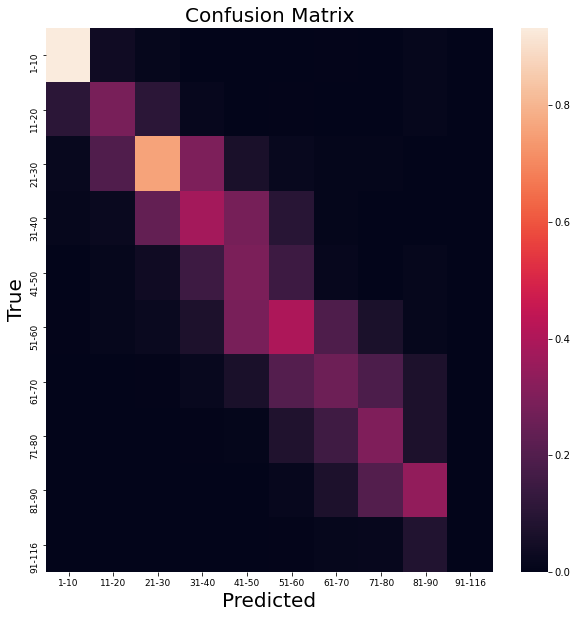

In [20]:
fig,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1) + 1e-9), annot=False, ax=ax)
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(['1-10','11-20','21-30','31-40', '41-50', '51-60','61-70', '71-80', '81-90', '91-116'], size=9); \
ax.yaxis.set_ticklabels(['1-10','11-20','21-30','31-40', '41-50', '51-60','61-70', '71-80', '81-90', '91-116'], size=9);